In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

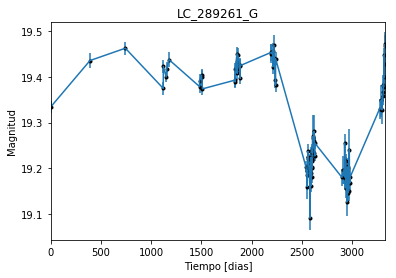

In [2]:
data = np.genfromtxt('LC_289261_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_289261_G')
plt.savefig("LC_289261_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

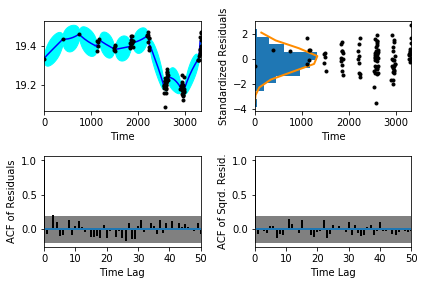

In [5]:
sample.assess_fit()

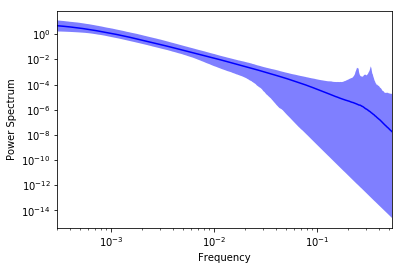

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

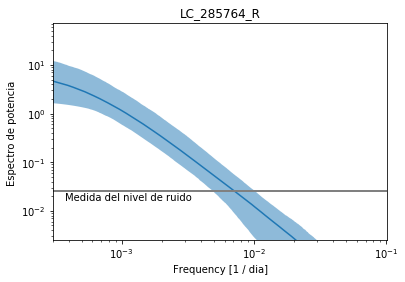

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_R')

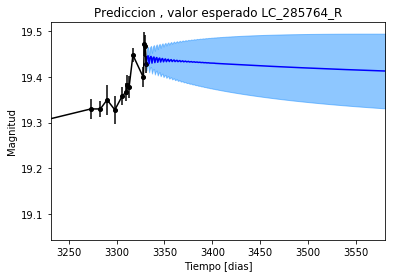

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_R')

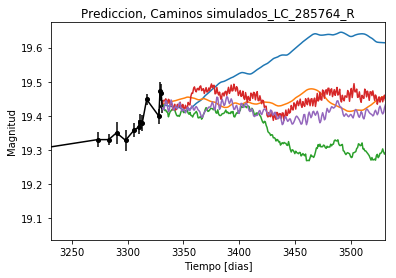

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


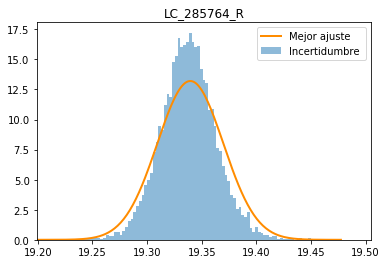

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_R')
plt.savefig("Mejor_ajuste_LC_285764_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

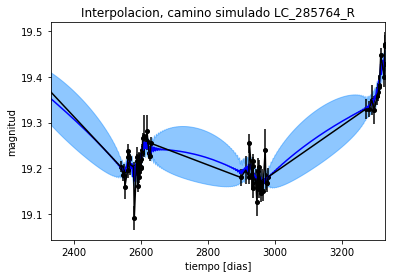

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_R')

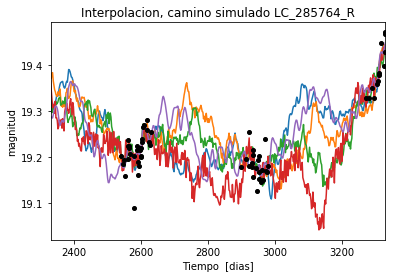

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1451.22468221
Median: 0.017032518501
Standard deviation: 0.204257986701
68% credibility interval: [ 0.00199098  0.18941969]
95% credibility interval: [  4.29122425e-04   8.11794918e-01]
99% credibility interval: [  3.24909166e-04   1.00989836e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 445.191630081
Median: 0.01146828496
Standard deviation: 0.109477530283
68% credibility interval: [ 0.00104389  0.0731079 ]
95% credibility interval: [  3.56616760e-04   3.72169267e-01]
99% credibility interval: [  3.07930837e-04   7.64341647e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 186.304685903
Median: 0.112053610627
Stand

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 569.158715377
Median: 262.777953639
Standard deviation: 2.19096253671
68% credibility interval: [ 260.67345614  264.84110671]
95% credibility interval: [ 257.84700187  266.81981144]
99% credibility interval: [ 255.78610321  267.59318418]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 227.119398745
Median: 1.60066188447
Standard deviation: 2.67355039431
68% credibility interval: [ 0.26191715  5.22953748]
95% credibility interval: [ 0.04922338  9.94863034]
99% credibility interval: [  0.0184609   12.09032288]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 498.269474469
Median: 4.37524406474
Standard deviation: 12.6934738037
68% credibility interval: [  0.90038548  19.7134768 ]
95% credibility interval: [  2.45938278e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2052.46416648
Median: 3.56252309205e-35
Standard deviation: 1.81956421553e+21
68% credibility interval: [  9.20541974e-67   1.67327825e-10]
95% credibility interval: [  6.71837856e-118   3.50216055e-001]
99% credibility interval: [  1.65828225e-120   1.22993861e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1658.91140444
Median: 19.3648820302
Standard deviation: 0.0461692884322
68% credibility interval: [ 19.3220862   19.40731469]
95% credibility interval: [ 19.27278998  19.46197666]
99% credibility interval: [ 19.23442624  19.48925234]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 308.92806455
Median: 0.261503079648
Standard deviation: 0.275171766185
68% credibility interval: [ 0.          0.62266144]
95% credibility interval: [ 0.          0.98333497]
99% credibility interval: [ 0.          1.05616795]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 308.92806455
Median: 0.261503079648
Standard deviation: 0.275171766185
68% credibility interval: [ 0.          0.62266144]
95% credibility interval: [ 0.          0.98333497]
99% credibility interval: [ 0.          1.05616795]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3098.62325511
Median: 0.0
Standard deviation: 0.000135529563664
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 569.158715377
Median: 262.777953639
Standard deviation: 2.19096253671
68% credibility interval: [ 260.67345614  264.84110671]
95% credibility interval: [ 257.84700187  266.81981144]
99% credibility interval: [ 255.78610321  267.59318418]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 537.93096442
Median: 0.00969099784011
Standard deviation: 0.00611873127899
68% credibility interval: [ 0.00661597  0.01420641]
95% credibility interval: [ 0.00480333  0.02413222]
99% credibility interval: [ 0.00401453  0.03924969]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 620.334133817
Median: 1.39286082929
Standard deviation: 0.24435511729
68% credibility interval: [ 1.1366379   1.64421684]
95% credibility interval: [ 0.93383512  1.87552052]
99% credibility interval: [ 0.79614319  1.9585812 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 562.075621848
Median: 0.0132511360081
Standard deviation: 0.203399846481
68% credibility interval: [ 0.00079586  0.12531172]
95% credibility interval: [  5.68402108e-06   6.91583232e-01]
99% credibility interval: [  1.43092061e-06   1.35609929e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1451.22468221
Median: (-0.10701846999+0j)
Standard deviation: 2.15322501706
68% credibility interval: [-1.19015901-6.28528267j -0.01250970-1.26956338j]
95% credibility interval: [ -5.10065790e+00-5.97213466j  -2.69625571e-03-1.73260343j]
99% credibility interval: [ -6.34537852e+00-0.00702834j  -2.04146450e-03-1.90464898j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 445.191630081
Median: (-0.0720573595591+2.40948799495j)
Standard deviation: 1.86076541403
68% credibility interval: [-0.45935047+1.74867918j -0.00655893+1.78842234j]
95% credibility interval: [ -2.33840847e+00+6.14195269j  -2.24068919e-03+0.j        ]
99% credibility interval: [ -4.80250021e+00+5.43925927j  -1.93478651e-03+2.12879988j]
Posterior summary 